In [6]:
import zipfile

zip_path = "/content/archive (1).zip"
extract_to = "data"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_to)


In [7]:
import pandas as pd
df = pd.read_csv('/content/data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Frame Shape

In [13]:
df.shape

(150, 6)

# Data Frame Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data Frame describe complete with min max and standard deviation

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Checking Nulls

In [10]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


# Count plots of Species feature

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


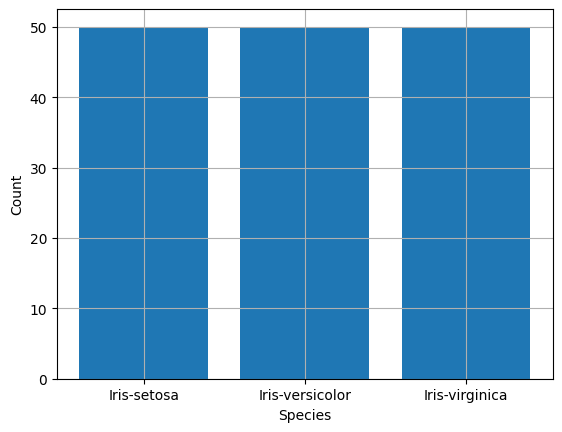

In [12]:
count = df['Species'].value_counts()
print(count)
import matplotlib.pyplot as plt
plt.bar(count.index, count.values)
plt.xlabel('Species')
plt.ylabel('Count')
plt.grid()
plt.show()

In [14]:
df = df.drop('Id', axis=1)

In [15]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Finding Range and Quartiles

In [16]:
numeric_cols = df.select_dtypes(include="number")

# Calculate Range
range_values = numeric_cols.max() - numeric_cols.min()

# Calculate Quartiles
quartiles = numeric_cols.quantile([0.25, 0.50, 0.75])

print("Range:")
print(range_values)

print("\nQuartiles (Q1, Q2, Q3):")
print(quartiles)

Range:
SepalLengthCm    3.6
SepalWidthCm     2.4
PetalLengthCm    5.9
PetalWidthCm     2.4
dtype: float64

Quartiles (Q1, Q2, Q3):
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0.25            5.1           2.8           1.60           0.3
0.50            5.8           3.0           4.35           1.3
0.75            6.4           3.3           5.10           1.8




# Average Sepal Length for Iris-setosa



In [17]:
average_sepal_length = df["SepalLengthCm"].mean()
print("Average Sepal Length for Iris-setosa:", average_sepal_length)

Average Sepal Length for Iris-setosa: 5.843333333333334


# Average Sepal Length for Iris-setosa

In [18]:
average_sepal_width = df["SepalWidthCm"].mean()
print("Average Sepal Length for Iris-setosa:", average_sepal_width)

Average Sepal Length for Iris-setosa: 3.0540000000000003


# Spread of Petal Width

In [19]:

spread = df["PetalWidthCm"].max() - df["PetalWidthCm"].min()
print("Spread of Petal Width:", spread)

Spread of Petal Width: 2.4


# Mean of each feature per species

In [20]:
mean_per_species = df.groupby("Species").mean()

print("Mean of each feature per species:")
print(mean_per_species)

Mean of each feature per species:
                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026


# Variance of each feature per species

In [21]:
variance_per_species = df.groupby("Species").var()

print("\nVariance of each feature per species:")
print(variance_per_species)


Variance of each feature per species:
                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa           0.124249      0.145180       0.030106      0.011494
Iris-versicolor       0.266433      0.098469       0.220816      0.039106
Iris-virginica        0.404343      0.104004       0.304588      0.075433


# Pair plot

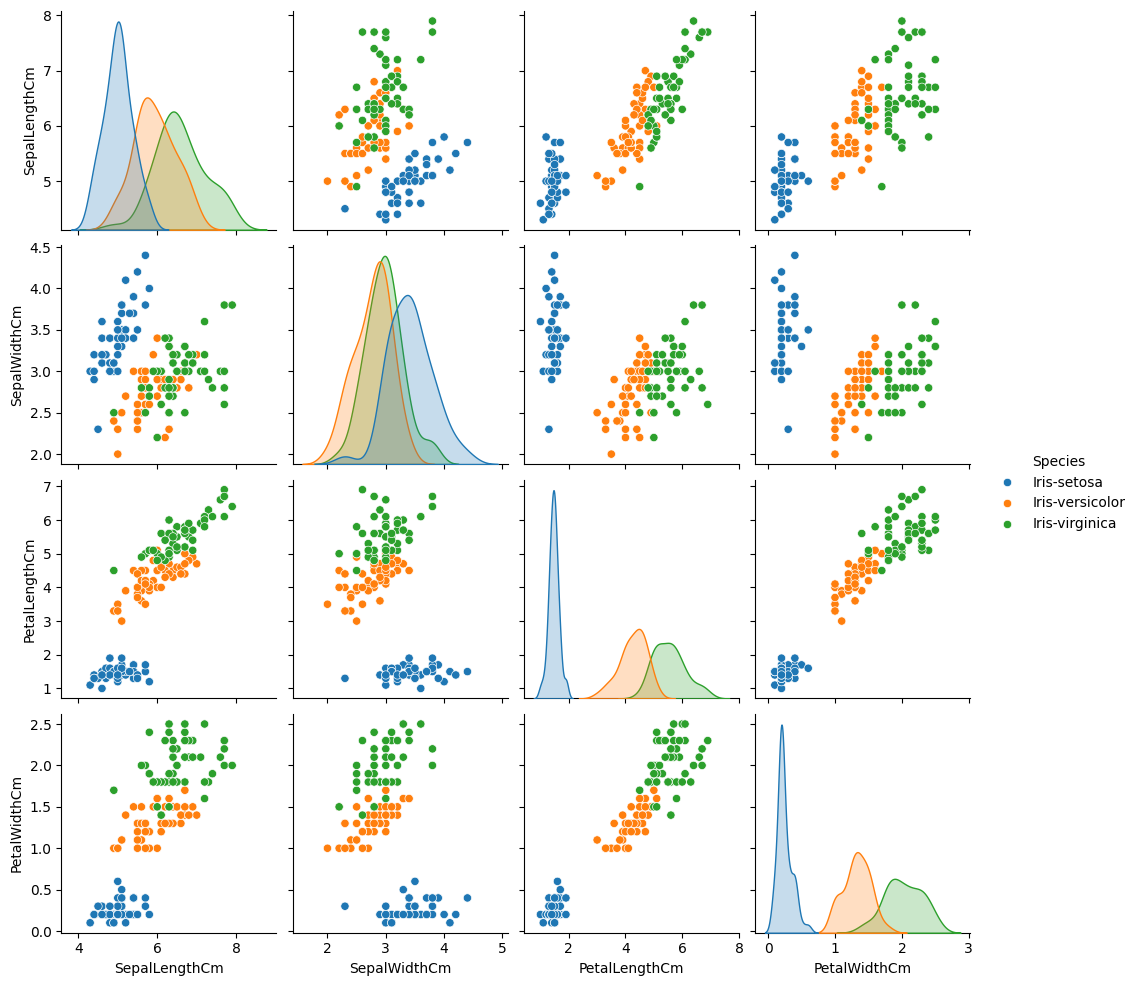

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df,
    hue="Species",
    diag_kind="kde",
    corner=False
)

plt.show()

# Correlations between features

In [23]:
correlation_matrix = df.drop(columns=["Species"]).corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Specific correlations
print("\nSepalLength vs SepalWidth:",
      correlation_matrix.loc["SepalLengthCm", "SepalWidthCm"])

print("PetalLength vs PetalWidth:",
      correlation_matrix.loc["PetalLengthCm", "PetalWidthCm"])

print("\nSepal vs Petal correlations:")
print(correlation_matrix.loc[
    ["SepalLengthCm", "SepalWidthCm"],
    ["PetalLengthCm", "PetalWidthCm"]
])

Correlation Matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

SepalLength vs SepalWidth: -0.10936924995064931
PetalLength vs PetalWidth: 0.9627570970509662

Sepal vs Petal correlations:
               PetalLengthCm  PetalWidthCm
SepalLengthCm       0.871754      0.817954
SepalWidthCm       -0.420516     -0.356544


# Hist plots of features

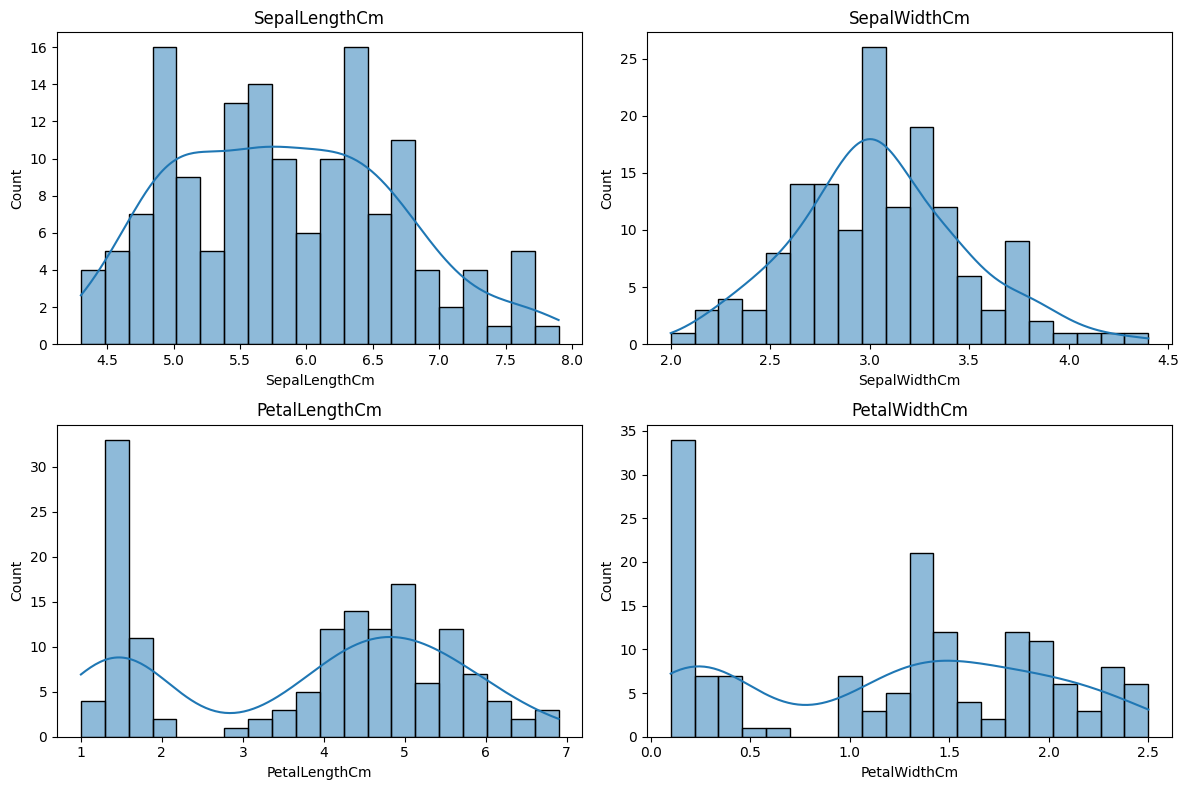

In [24]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(col)

plt.tight_layout()
plt.show()

# Species-wise KDE distributions

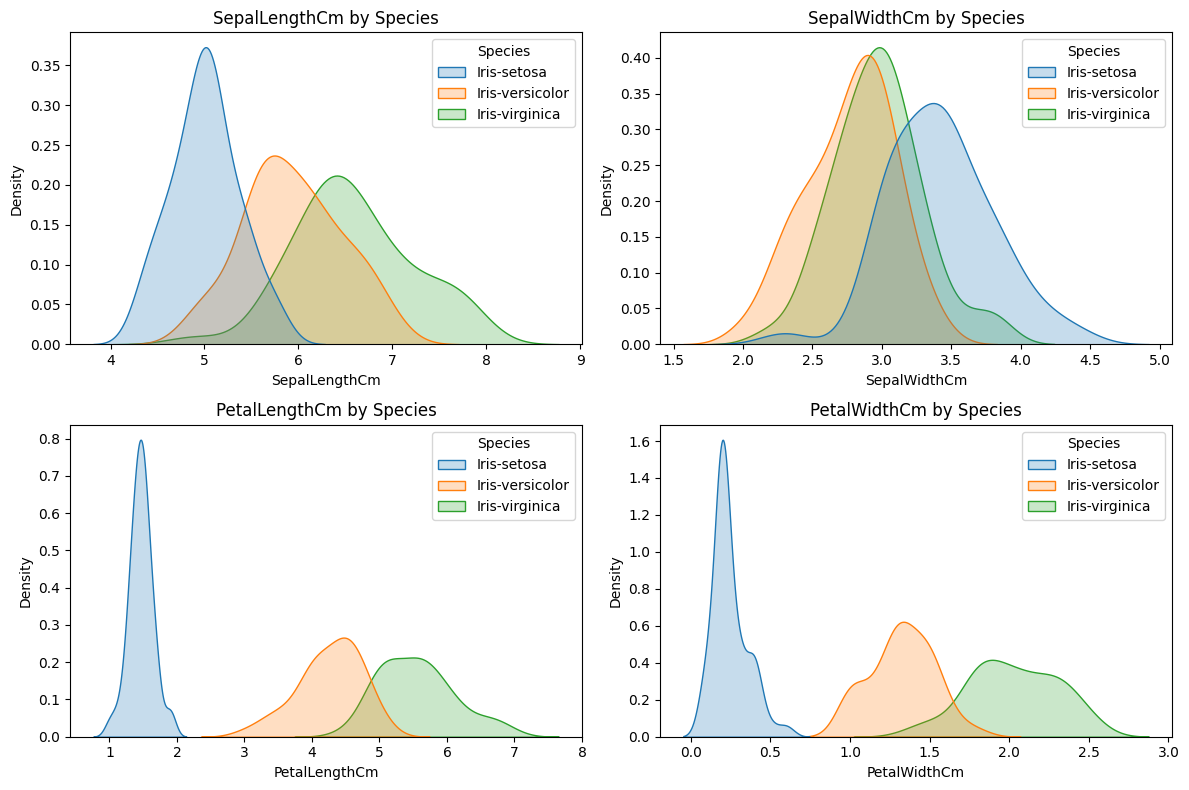

In [25]:

plt.figure(figsize=(12, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=df, x=col, hue="Species", fill=True)
    plt.title(f"{col} by Species")

plt.tight_layout()
plt.show()

# Finding Outliers' and craete a clean Data Frame

In [26]:

features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

outliers = {}

for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers[col] = df[(df[col] < lower) | (df[col] > upper)][col]


In [27]:
for feature, values in outliers.items():
    print(f"{feature}: {len(values)} outliers")

SepalLengthCm: 0 outliers
SepalWidthCm: 4 outliers
PetalLengthCm: 0 outliers
PetalWidthCm: 0 outliers


# Box plot for Visualizing outliers'

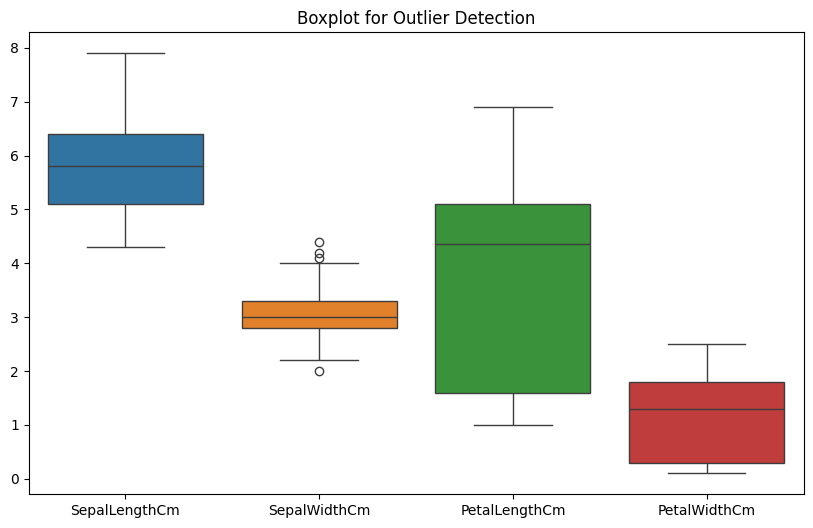

In [28]:


plt.figure(figsize=(10, 6))
sns.boxplot(data=df[features])
plt.title("Boxplot for Outlier Detection")
plt.show()


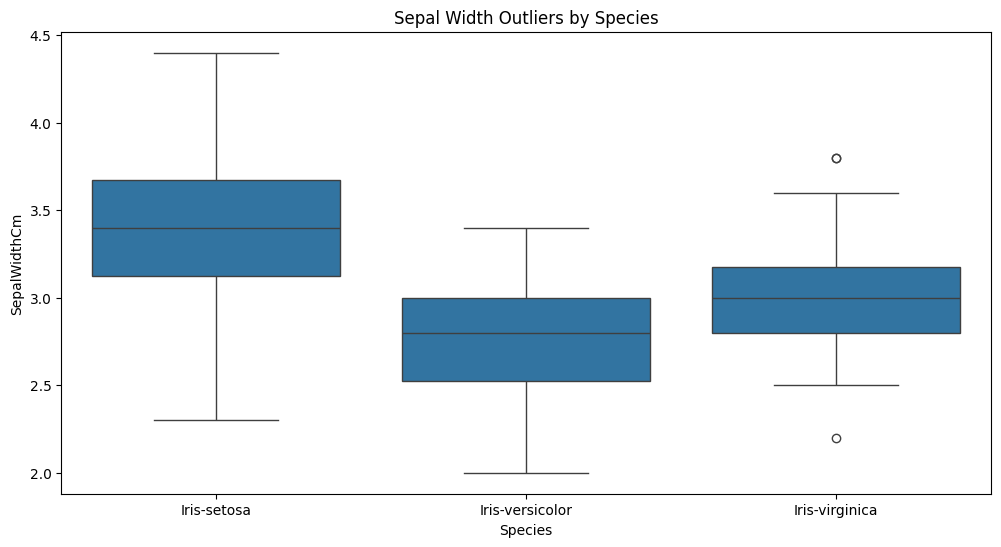

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Species", y="SepalWidthCm")
plt.title("Sepal Width Outliers by Species")
plt.show()

In [30]:
print("Original shape:", df.shape)

Original shape: (150, 5)


In [32]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
df = df.copy()

# IQR-based outlier removal
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[
        (df[col] >= lower_bound) &
        (df[col] <= upper_bound)
    ]
df.reset_index(drop=True, inplace=True)


print("After outlier removal:", df.shape)

After outlier removal: (146, 5)


# Mean Comparison and variance Comparison

In [35]:
import pandas as pd


mean_comparison = df.groupby("Species").mean()

# Variance comparison
variance_comparison = df.groupby("Species").var()

print("Mean Comparison:")
print(mean_comparison)

print("\nVariance Comparison:")
print(variance_comparison)


Mean Comparison:
                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa           4.976596      3.365957        1.46383      0.244681
Iris-versicolor       5.955102      2.785714        4.27551      1.332653
Iris-virginica        6.588000      2.974000        5.55200      2.026000

Variance Comparison:
                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa           0.114875      0.107512       0.031924      0.011221
Iris-versicolor       0.253359      0.087917       0.213138      0.037662
Iris-virginica        0.404343      0.104004       0.304588      0.075433


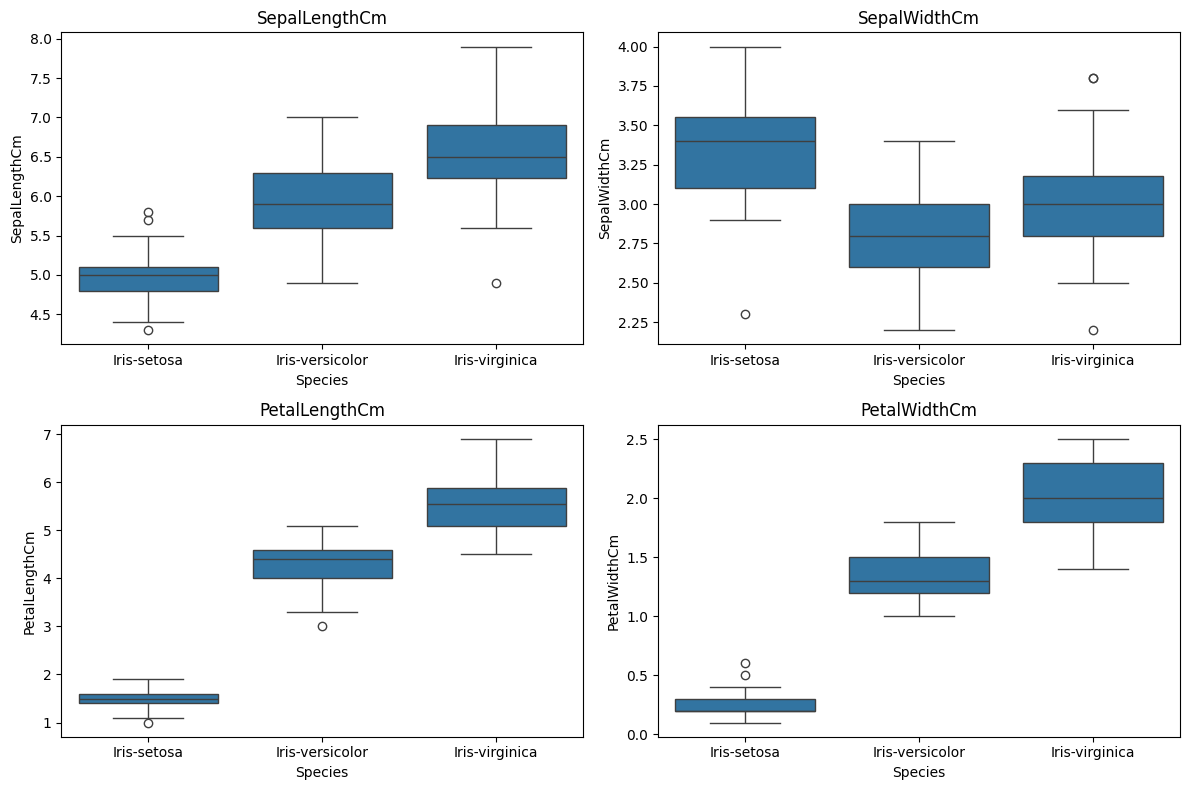

In [33]:
import matplotlib.pyplot as plt

features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="Species", y=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()

#t-Test: Compare Means Between Two Species

In [37]:
import pandas as pd
from scipy.stats import ttest_ind


setosa = df[df["Species"] == "Iris-setosa"]["PetalLengthCm"]
versicolor = df[df["Species"] == "Iris-versicolor"]["PetalLengthCm"]

t_stat, p_value = ttest_ind(setosa, versicolor, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -39.64840219483534
p-value: 4.77081882833121e-46


#ANOVA: Compare Means Across All Three Species

In [38]:
from scipy.stats import f_oneway

setosa_pw = df[df["Species"] == "Iris-setosa"]["PetalWidthCm"]
versicolor_pw = df[df["Species"] == "Iris-versicolor"]["PetalWidthCm"]
virginica_pw = df[df["Species"] == "Iris-virginica"]["PetalWidthCm"]

f_stat, p_value = f_oneway(setosa_pw, versicolor_pw, virginica_pw)

print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 924.1630619244892
p-value: 1.651375005656024e-82


#Normality (Shapiro–Wilk Test)

#H₀: Data is normally distributed

In [39]:


from scipy.stats import shapiro

stat, p = shapiro(setosa)
print("Shapiro p-value:", p)

Shapiro p-value: 0.11118471532016028


#B. Homogeneity of Variance (Levene’s Test)
#H₀: Variances are equal across groups


In [40]:

from scipy.stats import levene

stat, p = levene(setosa_pw, versicolor_pw, virginica_pw)
print("Levene p-value:", p)


#p > 0.05 → Equal variance assumption holds

Levene p-value: 4.4609060859922895e-08


# Violin PLots

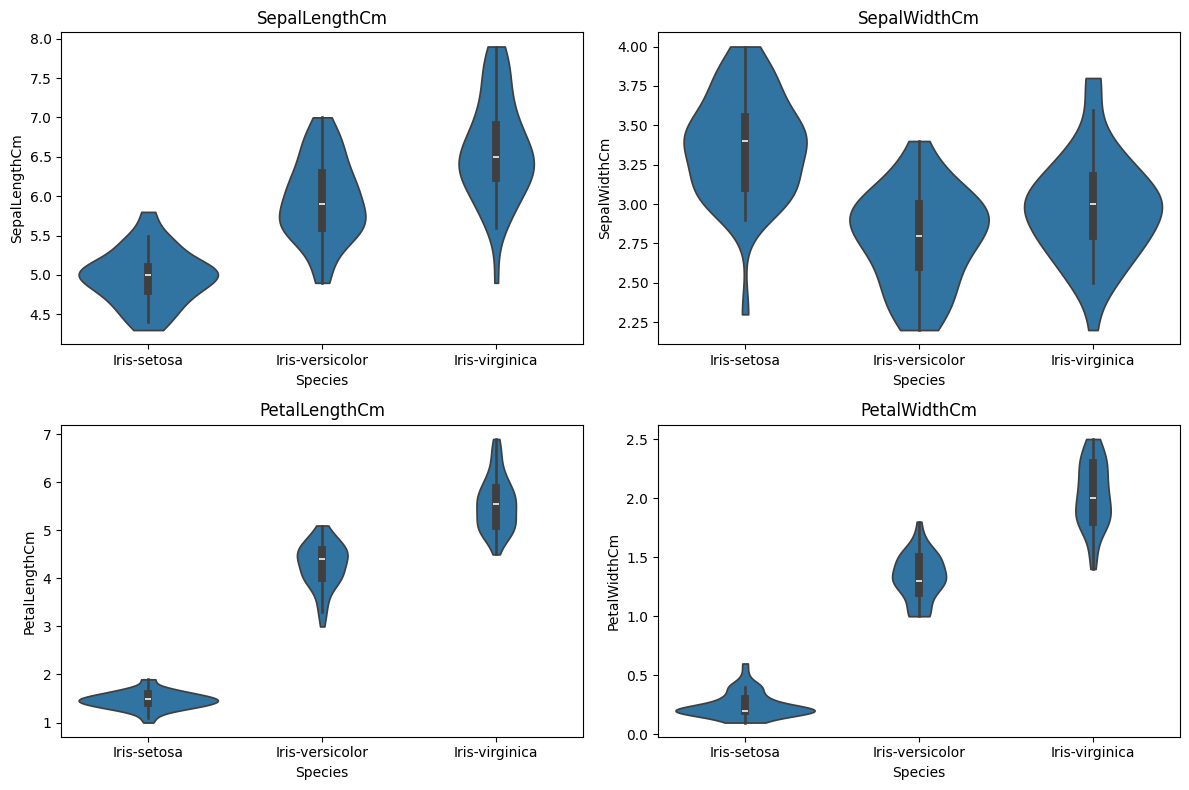

In [41]:

features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(
        data=df,
        x="Species",
        y=feature,
        inner="box",
        cut=0
    )
    plt.title(feature)

plt.tight_layout()
plt.show()


# Scatter plot

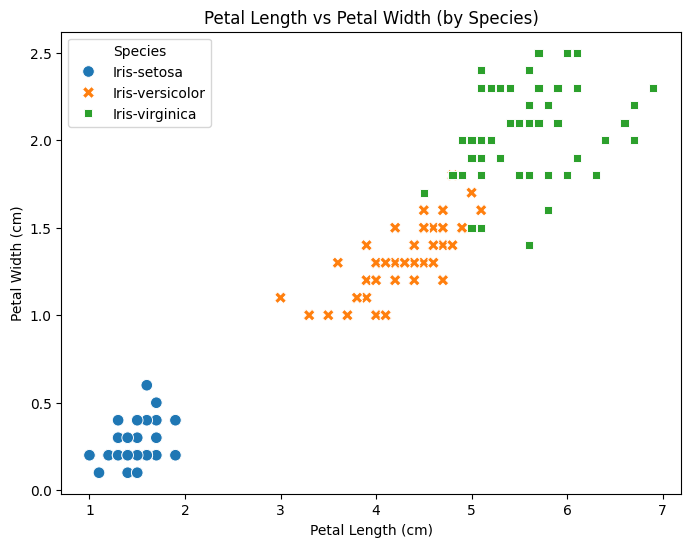

In [42]:

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="PetalLengthCm",
    y="PetalWidthCm",
    hue="Species",
    style="Species",
    s=70
)

plt.title("Petal Length vs Petal Width (by Species)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Species")
plt.show()

# 3D scattered PLot of features

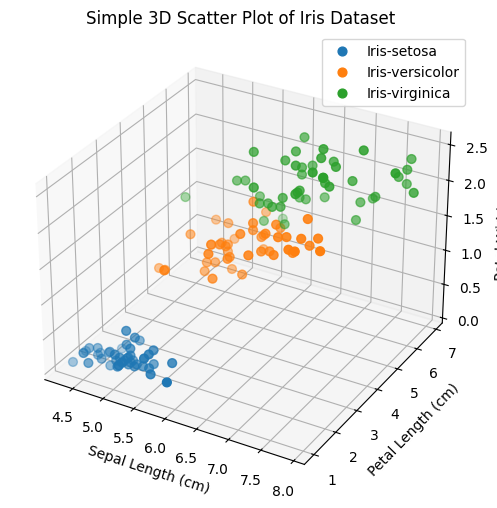

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

species_list = df["Species"].unique()

for species in species_list:
    subset = df[df["Species"] == species]
    ax.scatter(
        subset["SepalLengthCm"],
        subset["PetalLengthCm"],
        subset["PetalWidthCm"],
        label=species,
        s=40
    )

# Labels
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Petal Width (cm)")
ax.set_title("Simple 3D Scatter Plot of Iris Dataset")

ax.legend()
plt.show()


# Plot heatmap

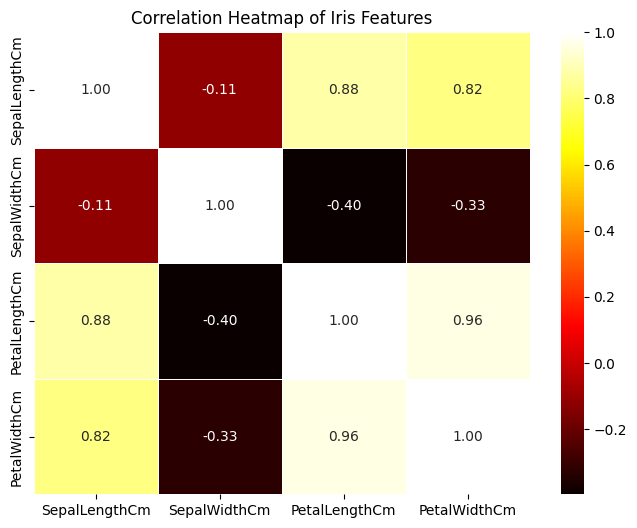

In [45]:
corr = df.drop(columns=["Species"]).corr()


plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="hot",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Iris Features")
plt.show()

# PCA (Principal Component Analysis)?

Principal Component Analysis (PCA) is a statistical and machine learning technique used for dimensionality reduction. It transforms a dataset with many correlated features into a smaller set of uncorrelated variables, called principal components, while preserving as much information (variance) as possible.

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



X = df.drop(columns=["Species"])
y = df["Species"]


X_scaled = StandardScaler().fit_transform(X)

In [48]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


pca_df = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"]
)
pca_df["Species"] = y.values


# Visualization

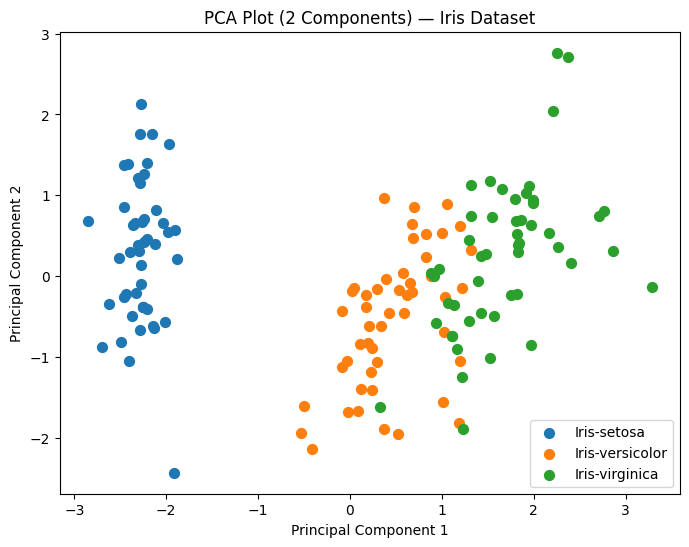

In [49]:
plt.figure(figsize=(8, 6))
for species in pca_df["Species"].unique():
    subset = pca_df[pca_df["Species"] == species]
    plt.scatter(
        subset["PC1"],
        subset["PC2"],
        label=species,
        s=50
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Plot (2 Components) — Iris Dataset")
plt.legend()
plt.show()

In [50]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())


Explained variance ratio: [0.72600625 0.23072944]
Total variance explained: 0.956735686213838


# Machinelearning Model BUilding

In [51]:
import joblib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [52]:
X = df.drop(columns=["Species"])
y = df["Species"]

In [53]:
X.shape

(146, 4)

In [54]:
y.shape

(146,)

# Devide data in train and test

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [56]:
print(X_train.shape, X_test.shape)

(116, 4) (30, 4)


# Classification Model

In [57]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [61]:
results = {}

# Train & evaluate each model
for name, model in models.items():

    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results[name] = {
        "pipeline": pipeline,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average="weighted"),
        "recall": recall_score(y_test, y_pred, average="weighted"),
        "f1_score": f1_score(y_test, y_pred, average="weighted")
    }

# Convert resul

In [62]:
models

{'Logistic Regression': LogisticRegression(max_iter=1000),
 'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
 'SVM': SVC(probability=True),
 'KNN': KNeighborsClassifier(),
 'Decision Tree': DecisionTreeClassifier(random_state=42)}

# Model Pipeline

In [63]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeClassifier(random_state=42))])

# Choose the best model

In [64]:
results_df = pd.DataFrame(results).T.sort_values(
    by="accuracy", ascending=False
)

print("Model Comparison:")
print(results_df[["accuracy", "precision", "recall", "f1_score"]])

Model Comparison:
                     accuracy precision    recall  f1_score
SVM                  0.966667  0.969697  0.966667  0.966583
Logistic Regression  0.933333  0.933333  0.933333  0.933333
Random Forest        0.933333  0.933333  0.933333  0.933333
Decision Tree        0.933333  0.944444  0.933333   0.93266
KNN                  0.866667  0.866667  0.866667  0.866667


In [65]:

best_model_name = results_df.index[0]
best_pipeline = results[best_model_name]["pipeline"]

print(f"\nBest Model: {best_model_name}")


joblib.dump(best_pipeline, "best_iris_model.pkl")
print("Best model saved as best_iris_model.pkl")



Best Model: SVM
Best model saved as best_iris_model.pkl


# classification Report

In [66]:
y_pred_best = best_pipeline.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))



Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

